**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import warnings
warnings.filterwarnings('ignore')

**LOAD THE DATA**

In [ ]:
df = pd.read_csv('/content/bank_transactions_data_2.csv')

In [ ]:
display(df.shape)
display(df.info())
display(df.head())
display(df.describe())

(2512, 16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

None

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [ ]:
df.isna().sum().sum(),df.duplicated().sum()

(0, 0)

In [ ]:
df.nunique()

,0
TransactionID,2512
AccountID,495
TransactionAmount,2455
TransactionDate,2512
TransactionType,2
Location,43
DeviceID,681
IP Address,592
MerchantID,100
Channel,3


In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

print("Numerical Columns:",numerical_columns)
print("Categorical Columns:",categorical_columns)

Numerical Columns: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
Categorical Columns: ['TransactionID', 'AccountID', 'TransactionDate', 'TransactionType', 'Location', 'DeviceID', 'IP Address', 'MerchantID', 'Channel', 'CustomerOccupation', 'PreviousTransactionDate']


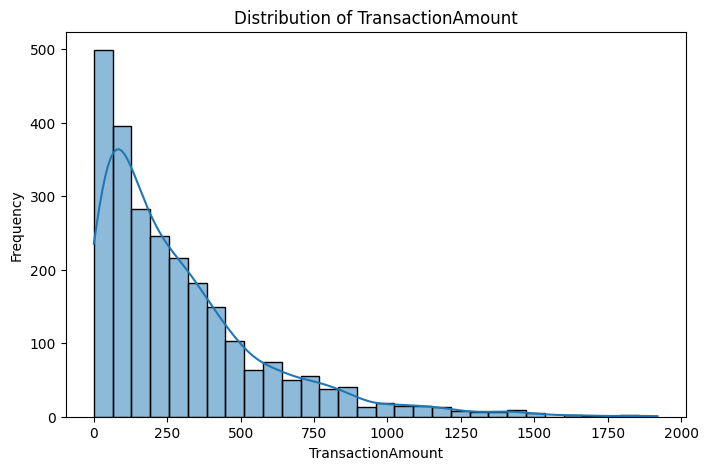

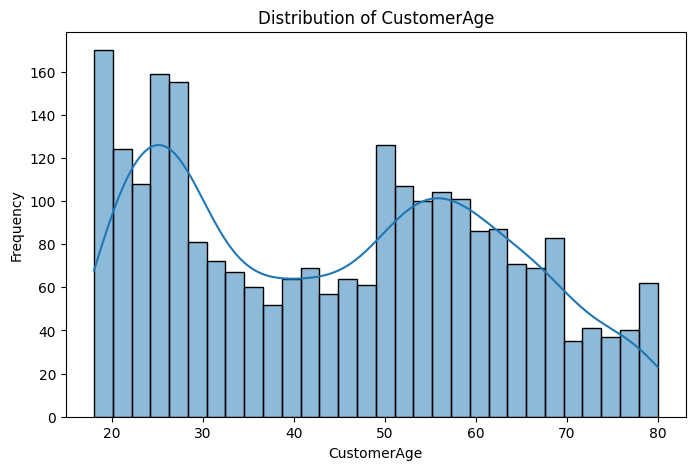

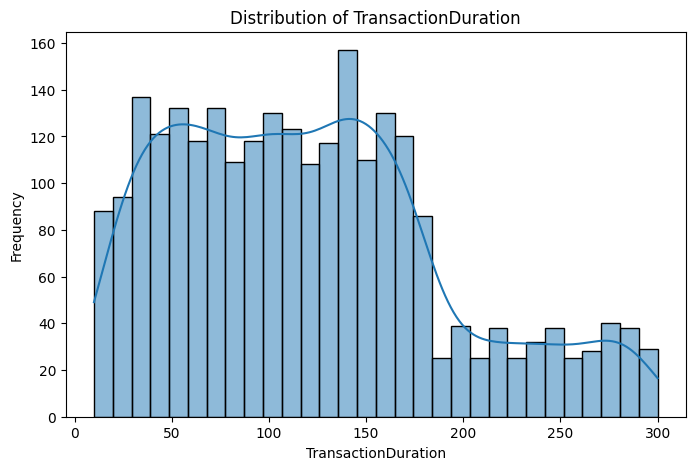

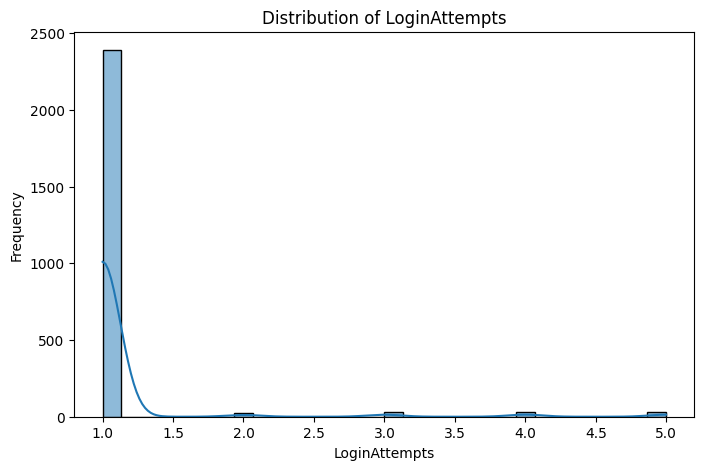

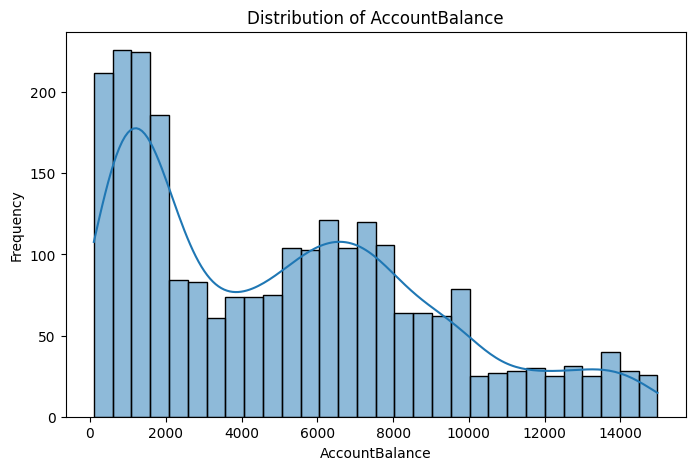

In [ ]:
def plot_histograms(df,numerical_columns):
  for column in numerical_columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

numerical_columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plot_histograms(df,numerical_columns)

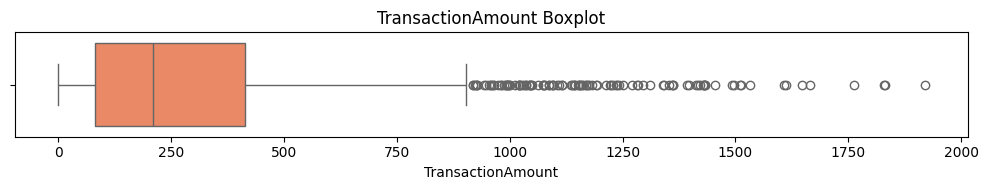

Summary Statistics for TransactionAmount:
 count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64


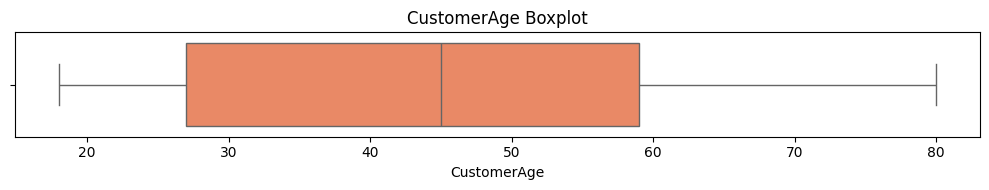

Summary Statistics for CustomerAge:
 count    2512.000000
mean       44.673965
std        17.792198
min        18.000000
25%        27.000000
50%        45.000000
75%        59.000000
max        80.000000
Name: CustomerAge, dtype: float64


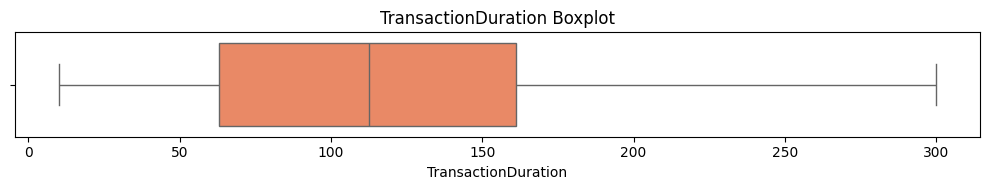

Summary Statistics for TransactionDuration:
 count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64


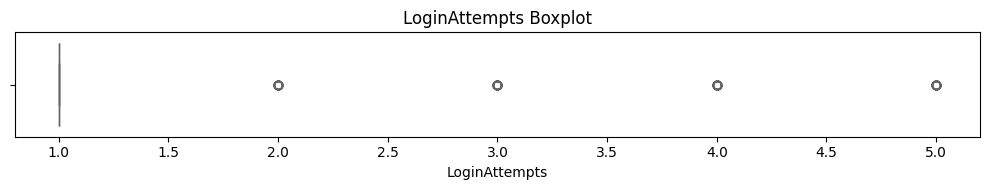

Summary Statistics for LoginAttempts:
 count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64


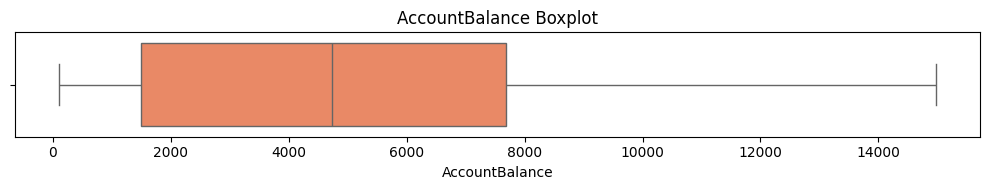

Summary Statistics for AccountBalance:
 count     2512.000000
mean      5114.302966
std       3900.942499
min        101.250000
25%       1504.370000
50%       4735.510000
75%       7678.820000
max      14977.990000
Name: AccountBalance, dtype: float64


In [ ]:
def univariate_analysis(data,column,title):
  plt.figure(figsize=(10,2))
  sns.boxplot(x=data[column], color='coral')
  plt.title(f'{title} Boxplot')
  plt.tight_layout()
  plt.show()
  print(f'Summary Statistics for {title}:\n', data[column].describe())

numerical_columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

for column in numerical_columns:
  univariate_analysis(df,column,column.replace('-',' '))

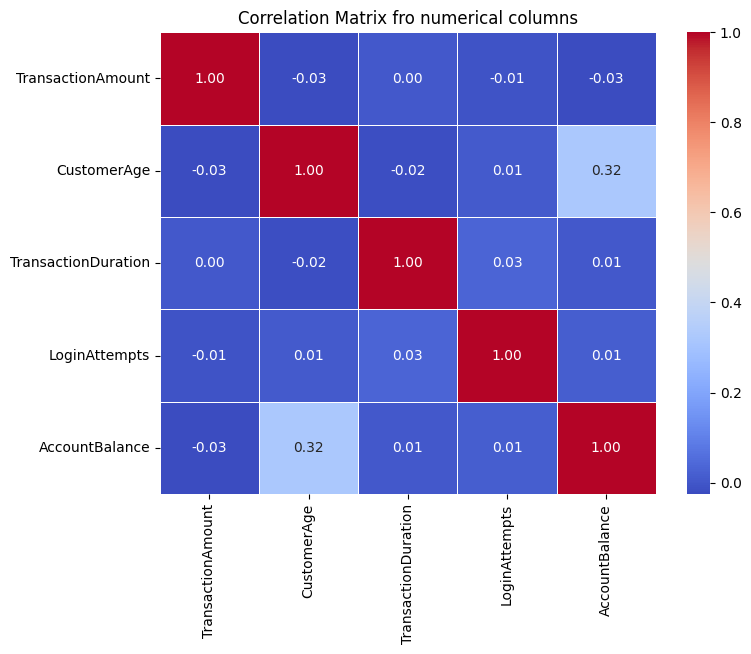

In [ ]:
correlation_matrix=df[numerical_columns].corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt=".2f")
plt.title('Correlation Matrix fro numerical columns')
plt.show()

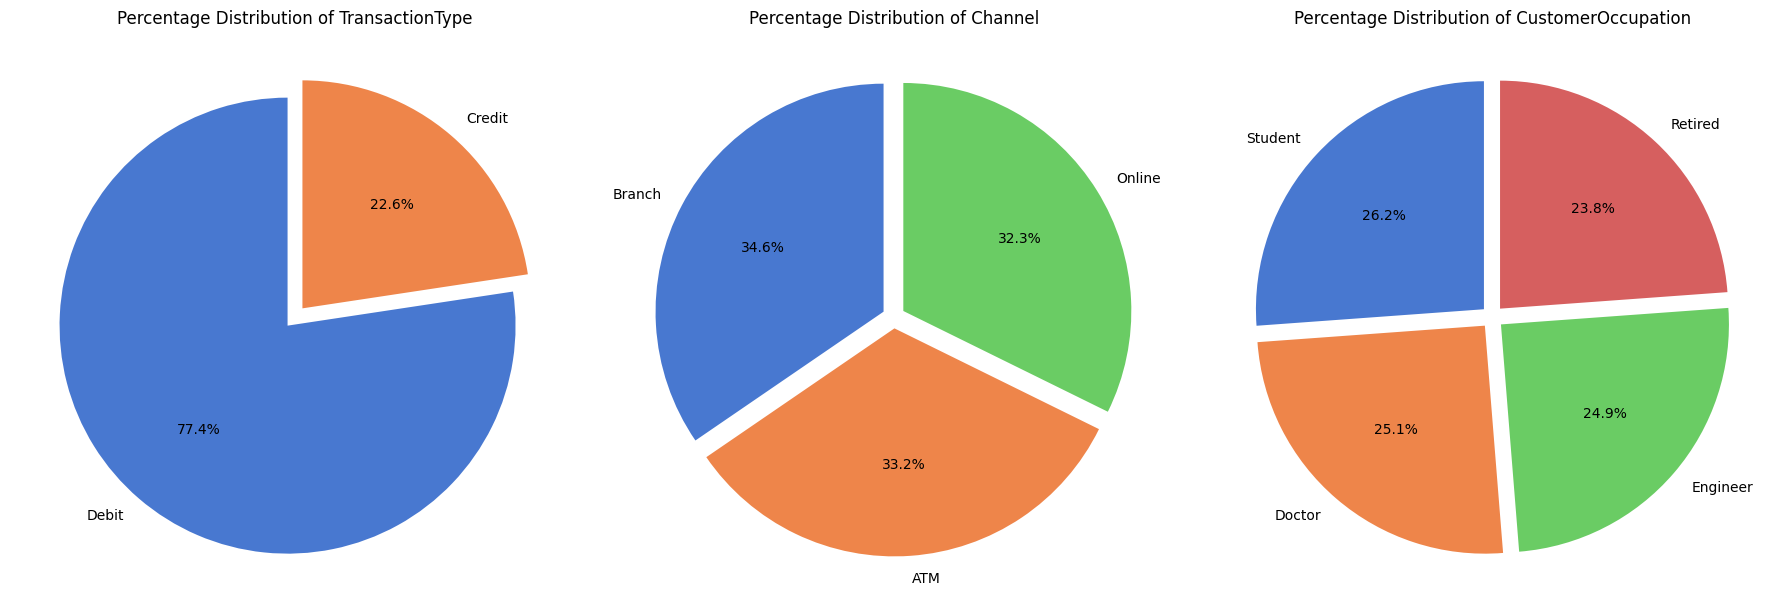

In [ ]:
def plot_categorical_distributions(columns, data, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        value_counts = data[column_name].value_counts()
        value_counts.plot.pie(
            autopct='%1.1f%%',
            colors=sns.color_palette(palette),
            startangle=90,
            explode=[0.05] * len(value_counts)
        )
        plt.title(f'Percentage Distribution of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['TransactionType', 'Channel', 'CustomerOccupation']
plot_categorical_distributions(columns_to_plot, data=df)

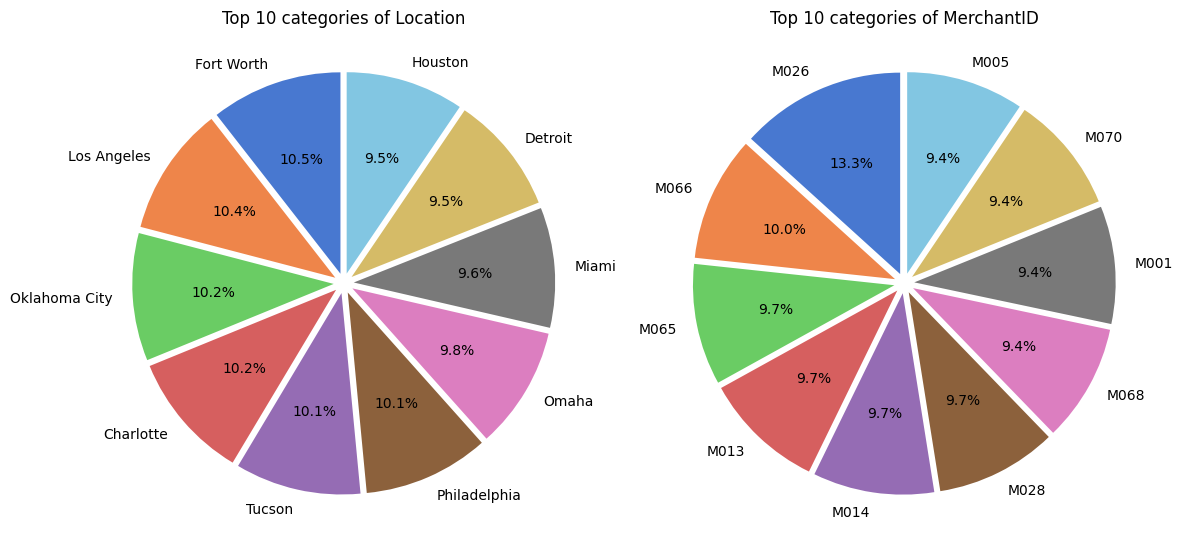

In [ ]:
def plot_top_categories_pie_charts(columns, data, palette='muted'):
    plt.figure(figsize=(len(columns) * 6, 6))
    for i, column_name in enumerate(columns):
        plt.subplot(1, len(columns), i + 1)
        top_categories = data[column_name].value_counts().nlargest(10)
        top_categories.plot.pie(
            autopct='%1.1f%%',
            colors=sns.color_palette(palette),
            startangle=90,
            explode=[0.05] * len(top_categories)
        )
        plt.title(f'Top 10 categories of {column_name}')
        plt.ylabel('')

    plt.tight_layout()
    plt.show()

columns_to_plot = ['Location', 'MerchantID']
plot_top_categories_pie_charts(columns_to_plot, data=df)

Number of high value transactions(top 5%): 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,20,Student,24,1,605.95,2024-11-04 08:06:51
82,TX000083,AC00236,922.55,2023-01-23 16:32:48,Debit,Detroit,D000206,21.97.154.92,M004,ATM,63,Retired,87,1,4715.84,2024-11-04 08:11:07
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,54,Engineer,30,1,8654.28,2024-11-04 08:06:53
110,TX000111,AC00068,1045.22,2023-11-22 16:13:39,Debit,Columbus,D000400,77.7.223.184,M077,ATM,53,Retired,73,1,1829.90,2024-11-04 08:07:35
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24


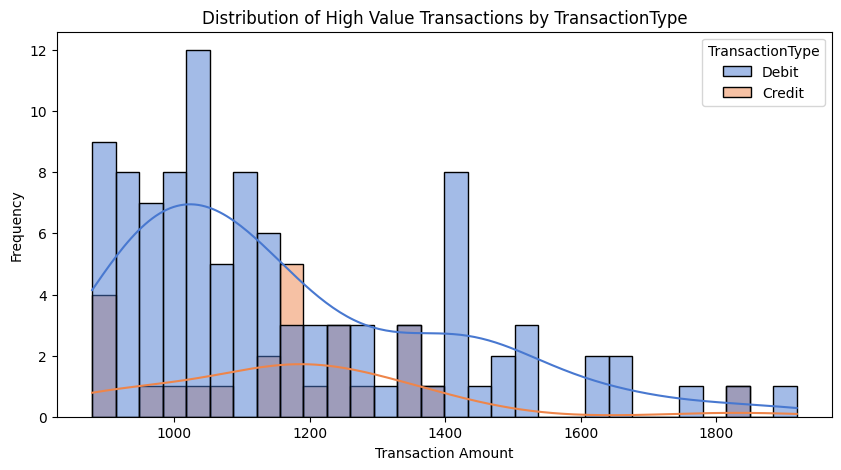

In [ ]:
high_value_threshold=df['TransactionAmount'].quantile(0.95)
high_value_transactions=df[df['TransactionAmount']>high_value_threshold]
print(f'Number of high value transactions(top 5%): {len(high_value_transactions)}')
display(high_value_transactions.head())

plt.figure(figsize=(10,5))
sns.histplot(data=high_value_transactions,x='TransactionAmount',bins=30,kde=True,hue='TransactionType',palette='muted')
plt.title('Distribution of High Value Transactions by TransactionType')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

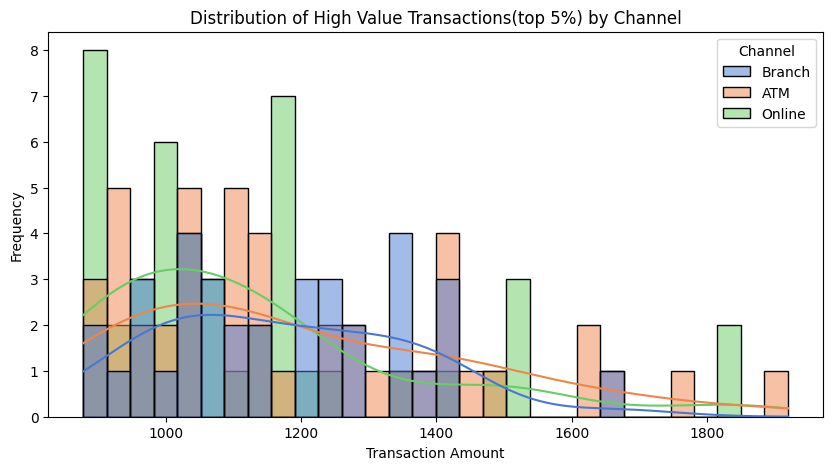

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(data=high_value_transactions,x='TransactionAmount',bins=30,kde=True,hue='Channel',palette='muted')
plt.title('Distribution of High Value Transactions(top 5%) by Channel')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

Number of frequent transactions(within 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,2480.0


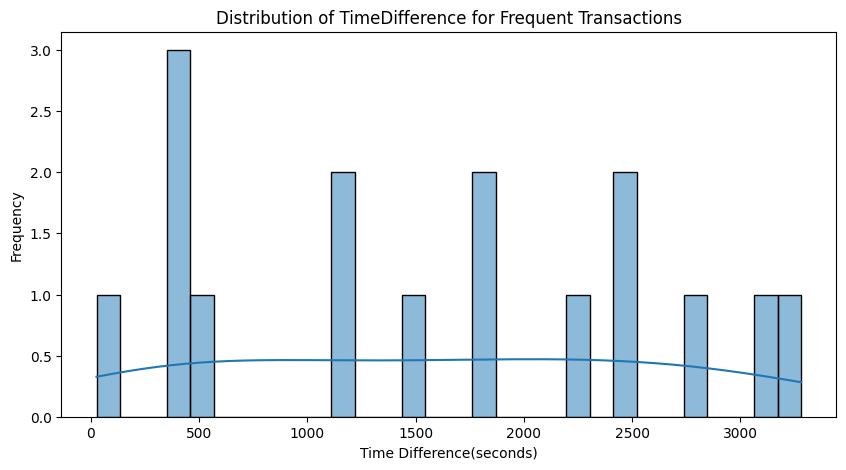

In [ ]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

df_sorted=df.sort_values(by=['AccountID','TransactionDate'])

df_sorted['TimeDifference']=df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()

short_interval_threshold = 3600
frequent_transactions=df_sorted[df_sorted['TimeDifference']<=short_interval_threshold]

print(f'Number of frequent transactions(within 1 hour): {len(frequent_transactions)}')
display(frequent_transactions.head())

plt.figure(figsize=(10,5))
sns.histplot(frequent_transactions['TimeDifference'],bins=30,kde=True)
plt.title('Distribution of TimeDifference for Frequent Transactions')
plt.xlabel('Time Difference(seconds)')
plt.ylabel('Frequency')
plt.show()

Number of large balance changes: 125


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67
6,TX000007,AC00199,7.08,2023-02-15 16:36:48,Credit,Seattle,D000241,140.212.253.222,M019,ATM,37,Doctor,139,1,13316.71,2024-11-04 08:10:09,13323.79
34,TX000035,AC00365,255.26,2023-10-27 16:42:49,Credit,San Francisco,D000357,92.214.76.157,M002,Branch,45,Doctor,50,1,14815.87,2024-11-04 08:10:51,15071.13
41,TX000042,AC00480,34.02,2023-01-09 16:13:21,Debit,Philadelphia,D000627,109.105.179.186,M046,Online,38,Doctor,19,1,14214.48,2024-11-04 08:11:45,14180.46
42,TX000043,AC00120,241.42,2023-04-20 18:57:43,Credit,Charlotte,D000198,60.89.202.192,M044,Online,57,Doctor,116,1,13357.02,2024-11-04 08:09:03,13598.44


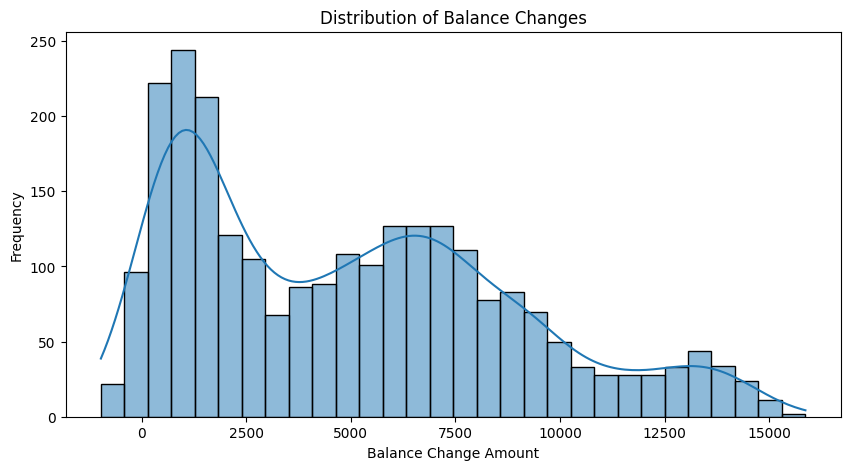

In [ ]:
df['BalanceChange']=df.apply(
    lambda row:row['AccountBalance']-row['TransactionAmount'] if row['TransactionType']=='Debit'
    else row['AccountBalance']+row['TransactionAmount'],
    axis=1
)

balance_change_threshold=df['BalanceChange'].mean()+2*df['BalanceChange'].std()
large_balance_changes=df[df['BalanceChange'].abs()>balance_change_threshold]
print(f'Number of large balance changes: {len(large_balance_changes)}')
display(large_balance_changes.head())

plt.figure(figsize=(10,5))
sns.histplot(df['BalanceChange'],bins=30,kde=True)
plt.title('Distribution of Balance Changes')
plt.xlabel('Balance Change Amount')
plt.ylabel('Frequency')
plt.show()

Number of transactions with more than one login attempt: 122


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange
23,TX000024,AC00453,345.84,2023-05-02 18:25:46,Debit,Fort Worth,D000162,191.82.103.198,M083,Online,22,Student,142,3,1402.50,2024-11-04 08:07:04,1056.66
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,23,Student,158,5,673.35,2024-11-04 08:11:38,426.42
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,49,Engineer,168,3,9690.15,2024-11-04 08:11:13,9293.70
38,TX000039,AC00478,795.31,2023-10-12 17:07:40,Debit,Mesa,D000077,49.29.37.185,M048,ATM,66,Doctor,90,2,7914.88,2024-11-04 08:11:17,7119.57
61,TX000062,AC00002,263.99,2023-05-16 16:07:30,Debit,Dallas,D000285,7.146.35.122,M087,Branch,79,Retired,227,2,4175.02,2024-11-04 08:11:03,3911.03


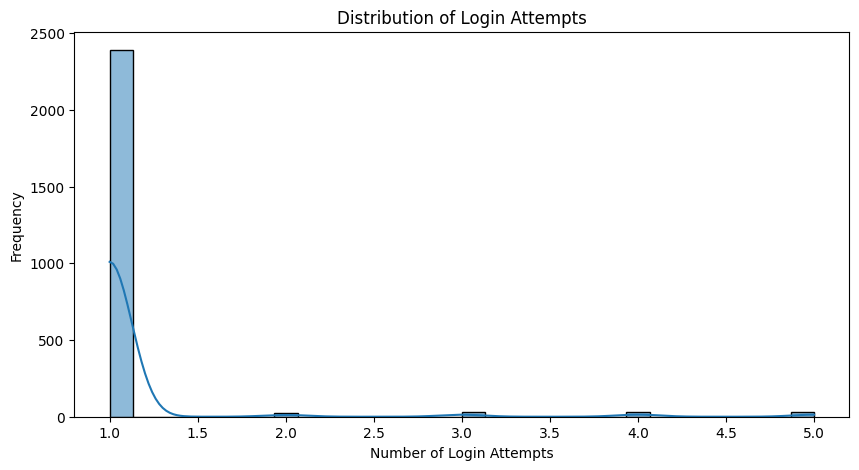

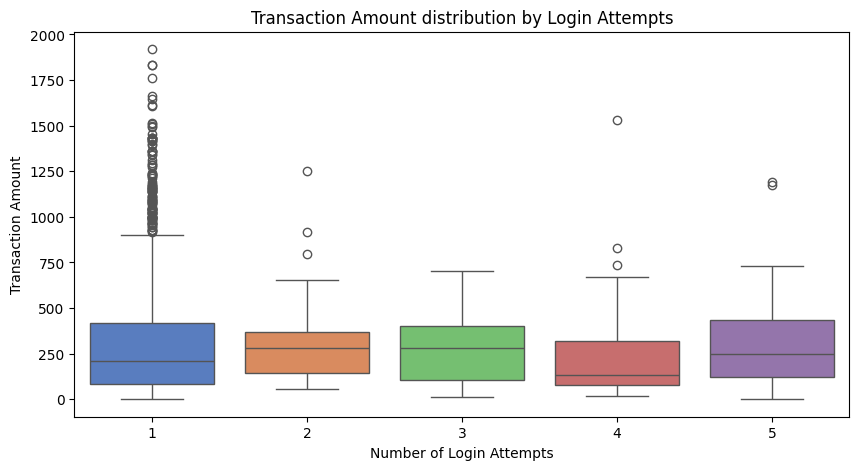

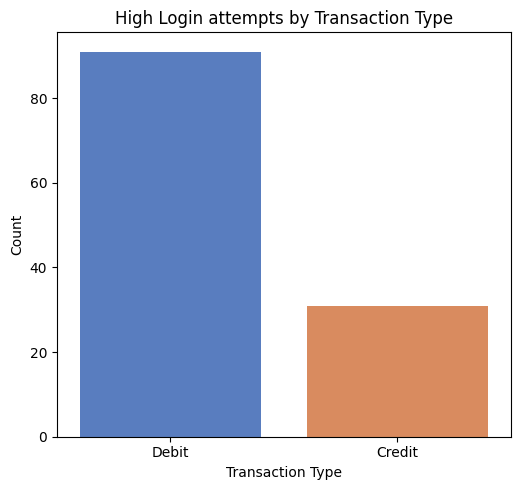

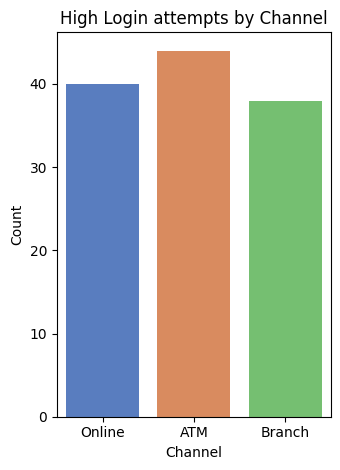

In [ ]:
high_login_attempts=df[df['LoginAttempts']>1]
print(f'Number of transactions with more than one login attempt: {len(high_login_attempts)}')
display(high_login_attempts.head())

plt.figure(figsize=(10,5))
sns.histplot(df['LoginAttempts'],bins=30,kde=True)
plt.title('Distribution of Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10,5))
sns.boxplot(x='LoginAttempts',y='TransactionAmount',data=df,palette='muted')
plt.title('Transaction Amount distribution by Login Attempts')
plt.xlabel('Number of Login Attempts')
plt.ylabel('Transaction Amount')
plt.show()

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(data=high_login_attempts,x='TransactionType',palette='muted')
plt.title('High Login attempts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.subplot(1,2,2)
sns.countplot(data=high_login_attempts,x='Channel',palette='muted')
plt.title('High Login attempts by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

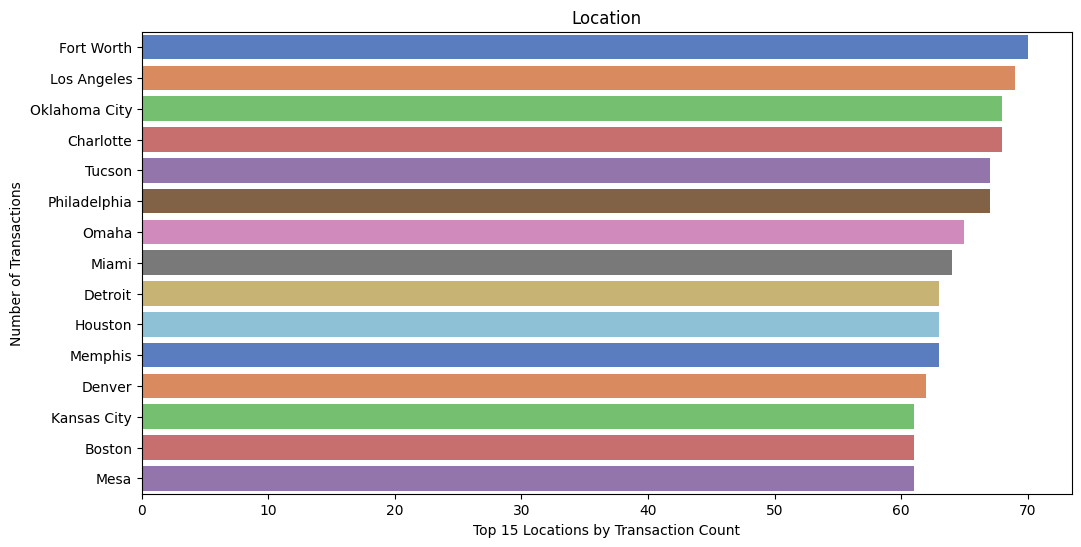

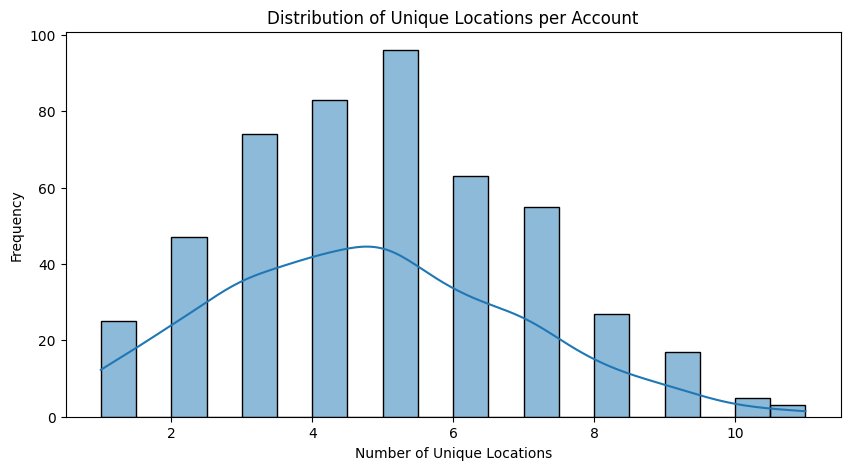


Number of transactions with multiple locations: 349


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,UniqueLocations
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67,7
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,4
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,8384.56,7
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,7442.85,6



Identifying accounts with significant Location Shift:


,AccountID,UniqueLocations
1,AC00002,7
2,AC00003,5
3,AC00004,9
4,AC00005,9
6,AC00007,5
8,AC00009,5
9,AC00010,7
10,AC00011,5
11,AC00012,6
12,AC00013,7


In [ ]:
plt.figure(figsize=(12,6))
top_locations=df['Location'].value_counts().nlargest(15)
sns.barplot(x=top_locations.values,y=top_locations.index,palette='muted')
plt.title('Location')
plt.xlabel('Top 15 Locations by Transaction Count')
plt.ylabel('Number of Transactions')
plt.show()

location_counts_per_account=df.groupby('AccountID')['Location'].nunique().reset_index()
location_counts_per_account.columns=['AccountID','UniqueLocations']
plt.figure(figsize=(10,5))
sns.histplot(location_counts_per_account['UniqueLocations'],bins=20,kde=True)
plt.title('Distribution of Unique Locations per Account')
plt.xlabel('Number of Unique Locations')
plt.ylabel('Frequency')
plt.show()

location_counts=df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location':'UniqueLocations'})
uncommon_location_transactions=df.merge(location_counts,on='AccountID')
uncommon_location_transactions=uncommon_location_transactions[uncommon_location_transactions['UniqueLocations']>3]
print(f"\nNumber of transactions with multiple locations: {len(uncommon_location_transactions['AccountID'].unique())}")
display(uncommon_location_transactions.head())

print(f"\nIdentifying accounts with significant Location Shift:")
significant_location_shifts=location_counts[location_counts['UniqueLocations']>3]
display(significant_location_shifts.head(10))

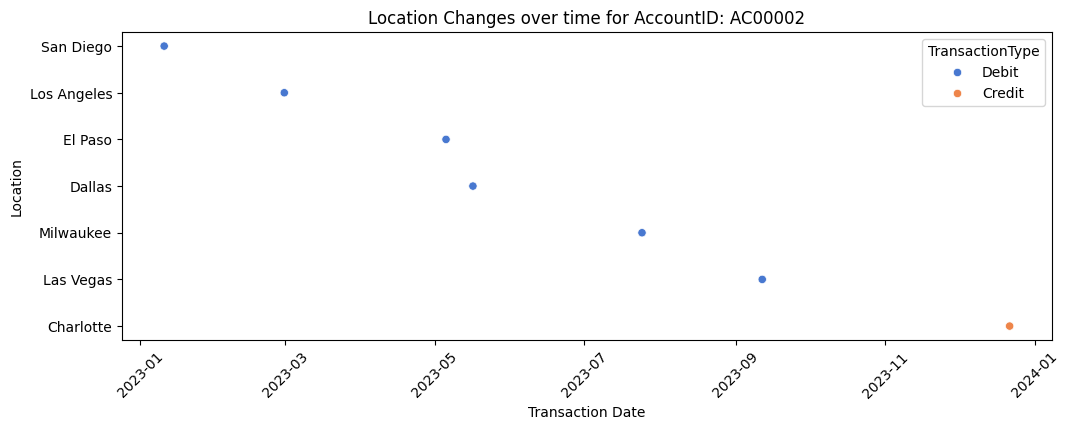

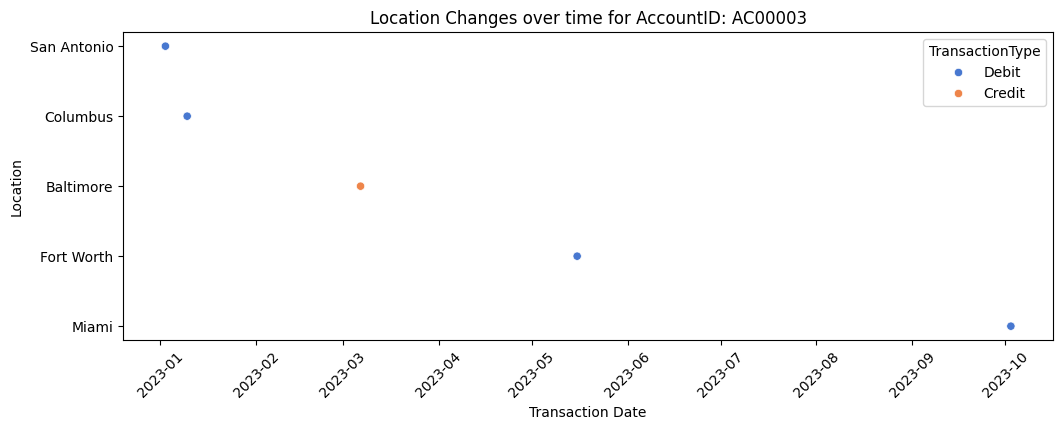

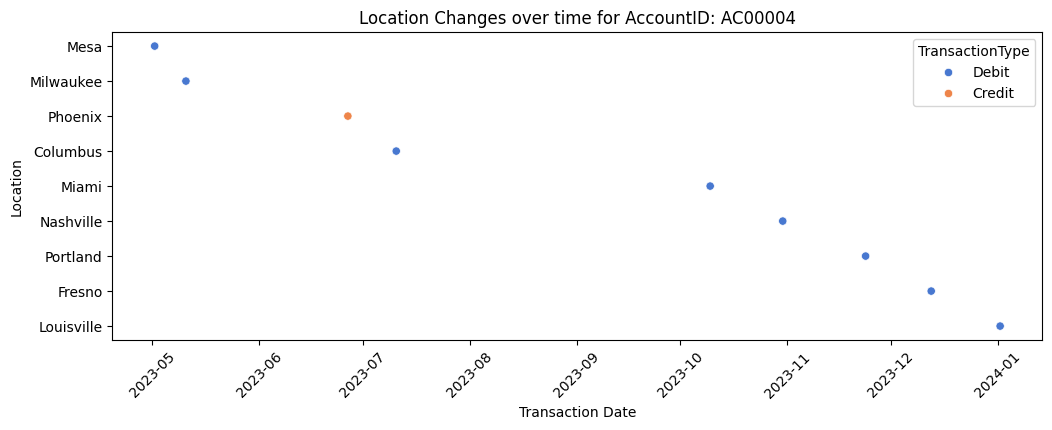

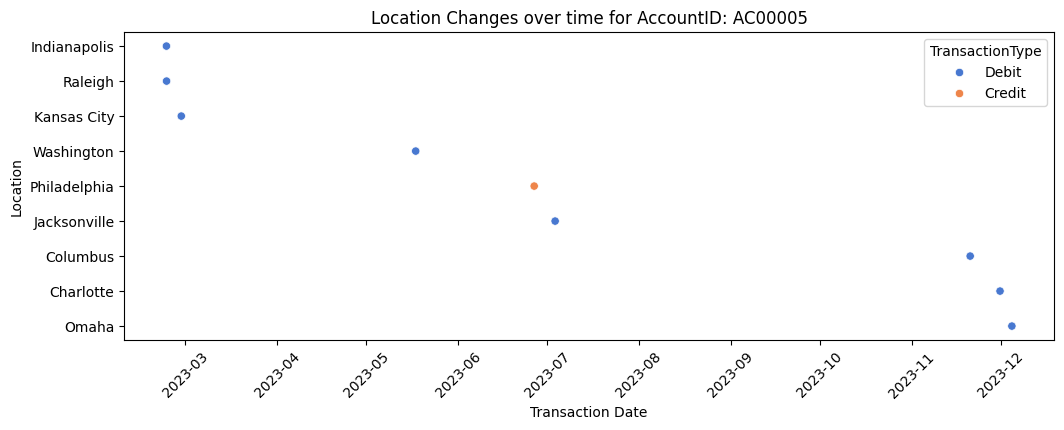

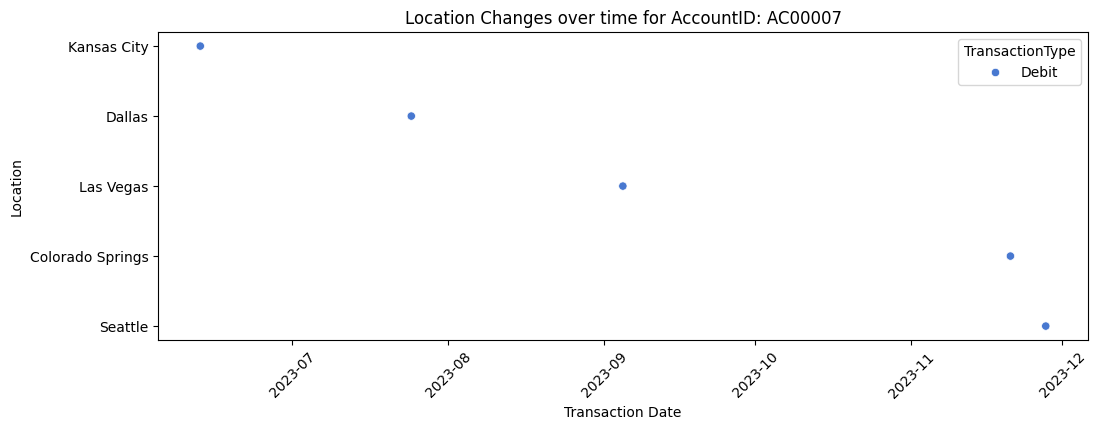

In [ ]:
selected_accounts=significant_location_shifts['AccountID'].head(5)
for account_id in selected_accounts:
  account_data=df[df['AccountID']==account_id].sort_values(by='TransactionDate')
  plt.figure(figsize=(12,4))
  sns.scatterplot(x=account_data['TransactionDate'],y=account_data['Location'],hue=account_data['TransactionType'],palette='muted')
  plt.title(f'Location Changes over time for AccountID: {account_id}')
  plt.xlabel('Transaction Date')
  plt.ylabel('Location')
  plt.xticks(rotation=45)
  plt.legend(title='TransactionType')
  plt.show()

Number of transactions during unusual hours: 377


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,996.06,18
17,TX000018,AC00359,492.93,2023-12-14 18:32:14,Debit,Columbus,D000432,114.223.129.47,M059,Online,39,Engineer,234,1,5109.97,2024-11-04 08:11:51,4617.04,18
19,TX000020,AC00285,71.48,2023-06-08 18:18:50,Credit,Columbus,D000039,120.170.93.69,M039,Online,18,Student,169,1,6568.59,2024-11-04 08:09:20,6640.07,18
21,TX000022,AC00014,85.77,2023-08-11 18:31:31,Debit,Las Vegas,D000268,59.132.247.252,M065,Branch,38,Doctor,93,1,9146.19,2024-11-04 08:08:13,9060.42,18
22,TX000023,AC00095,52.20,2023-06-06 18:54:15,Debit,Atlanta,D000142,133.63.96.21,M022,Online,39,Engineer,120,1,8974.93,2024-11-04 08:07:01,8922.73,18


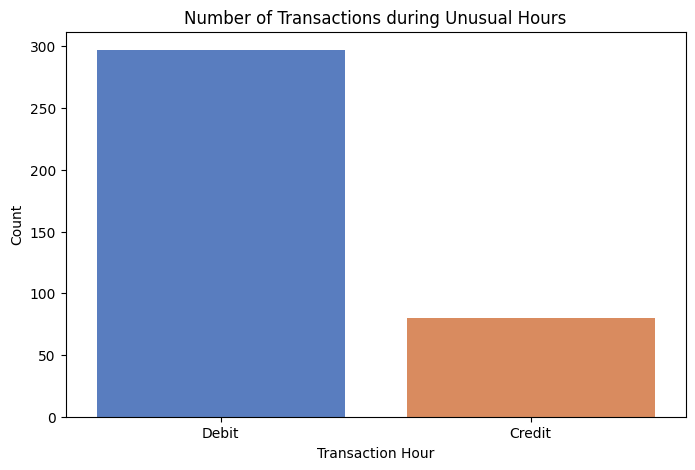

In [ ]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'],errors='coerce')
df['TransactionHour']=df['TransactionDate'].dt.hour

unusual_hours=list(range(0,9))+list(range(18,24))

unsual_hour_transactions=df[df['TransactionHour'].isin(unusual_hours)]
print(f'Number of transactions during unusual hours: {len(unsual_hour_transactions)}')
display(unsual_hour_transactions.head())

plt.figure(figsize=(8,5))
sns.countplot(data=unsual_hour_transactions,x='TransactionType',palette='muted')
plt.title('Number of Transactions during Unusual Hours')
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.show()

Number of transactions with time difference of less than 1 hour): 16


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,TimeDifference
95,TX000096,AC00010,508.68,2023-06-26 16:16:50,Credit,Mesa,D000622,193.108.17.115,M048,Branch,51,Engineer,127,1,7708.41,2024-11-04 08:09:32,8217.09,16,505.0
1258,TX001259,AC00020,603.23,2023-08-24 17:34:13,Debit,Detroit,D000238,38.210.156.148,M017,Branch,28,Student,48,1,117.98,2024-11-04 08:08:18,-485.25,17,2812.0
2497,TX002498,AC00030,348.17,2023-05-10 17:56:31,Debit,El Paso,D000269,82.51.236.134,M072,ATM,21,Student,181,1,1887.84,2024-11-04 08:11:06,1539.67,17,394.0
496,TX000497,AC00114,286.50,2023-10-23 16:58:04,Credit,Boston,D000602,16.128.130.153,M097,Branch,30,Engineer,60,1,8517.95,2024-11-04 08:09:17,8804.45,16,451.0
2341,TX002342,AC00144,97.73,2023-05-29 17:55:23,Debit,Sacramento,D000038,135.29.211.116,M018,Branch,69,Doctor,156,1,7885.21,2024-11-04 08:08:27,7787.48,17,2480.0


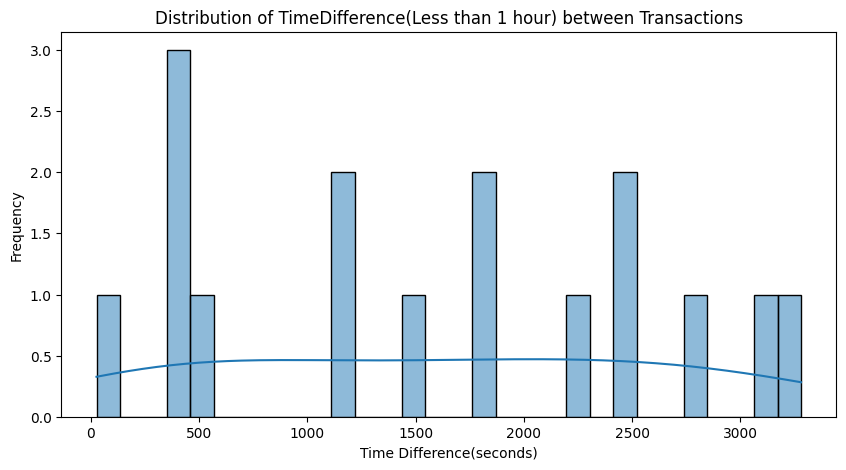

In [ ]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])

df_sorted=df.sort_values(by=['AccountID','TransactionDate'])

df_sorted['TimeDifference']=df_sorted.groupby('AccountID')['TransactionDate'].diff().dt.total_seconds()
rapid_transactions = df_sorted[df_sorted['TimeDifference']<=3600]
print(f'Number of transactions with time difference of less than 1 hour): {len(rapid_transactions)}')
display(rapid_transactions.head())

plt.figure(figsize=(10,5))
sns.histplot(rapid_transactions['TimeDifference'].dropna(),bins=30,kde=True)
plt.title('Distribution of TimeDifference(Less than 1 hour) between Transactions')
plt.xlabel('Time Difference(seconds)')
plt.ylabel('Frequency')
plt.show()

Number of unusually high-value transactions: 62


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount
60,TX000061,AC00438,568.52,2023-10-06 18:44:37,Debit,Indianapolis,D000233,27.143.109.203,M094,ATM,46,Engineer,152,1,5499.91,2024-11-04 08:06:25,4931.39,18,165.691250
129,TX000130,AC00320,1036.66,2023-07-11 16:39:53,Debit,San Antonio,D000015,53.218.177.171,M062,Branch,58,Doctor,144,1,5541.57,2024-11-04 08:09:24,4504.91,16,335.652000
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,80,Retired,21,1,2037.85,2024-11-04 08:10:34,987.93,16,317.322857
176,TX000177,AC00363,1362.55,2023-02-10 18:07:07,Debit,El Paso,D000213,93.52.44.101,M001,ATM,29,Engineer,106,1,2429.68,2024-11-04 08:11:05,1067.13,18,391.909167
190,TX000191,AC00396,1422.55,2023-07-10 17:49:18,Debit,Washington,D000569,188.124.181.12,M072,Branch,79,Retired,165,1,5674.32,2024-11-04 08:06:50,4251.77,17,410.837500


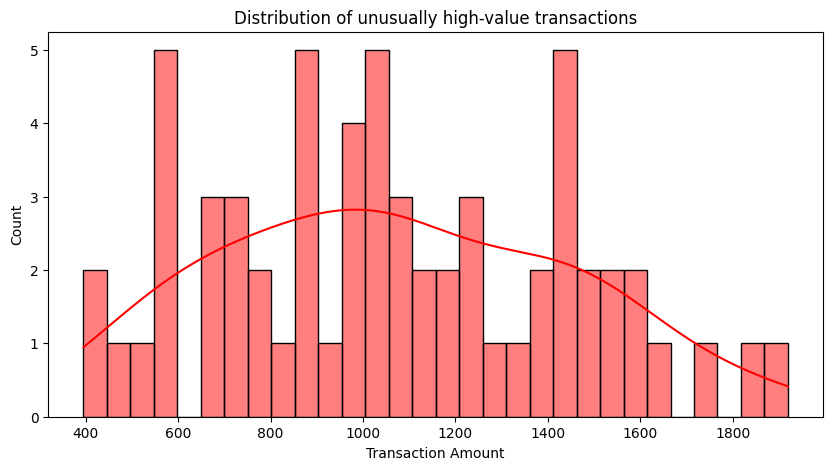

In [ ]:
account_avg=df.groupby('AccountID')['TransactionAmount'].mean().reset_index().rename(columns={'TransactionAmount':'AverageTransactionAmount'})
df=df.merge(account_avg,on='AccountID')

unusual_transactions=df[df['TransactionAmount']>(df['AverageTransactionAmount']*3)]
print(f'Number of unusually high-value transactions: {len(unusual_transactions)}')
display(unusual_transactions.head())

plt.figure(figsize=(10,5))
sns.histplot(unusual_transactions['TransactionAmount'],bins=30,kde=True,color='red')
plt.title('Distribution of unusually high-value transactions')
plt.xlabel('Transaction Amount')
plt.show()

Number of accounts with high location variability: 1282


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,5098.12,16,460.698571,7
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,13382.67,16,304.622857,7
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,8384.56,16,236.483750,7
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,7442.85,17,280.796667,6
5,TX000006,AC00393,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,D000579,117.67.192.211,M054,ATM,18,Student,172,1,781.68,2024-11-04 08:06:36,689.53,17,209.206250,7


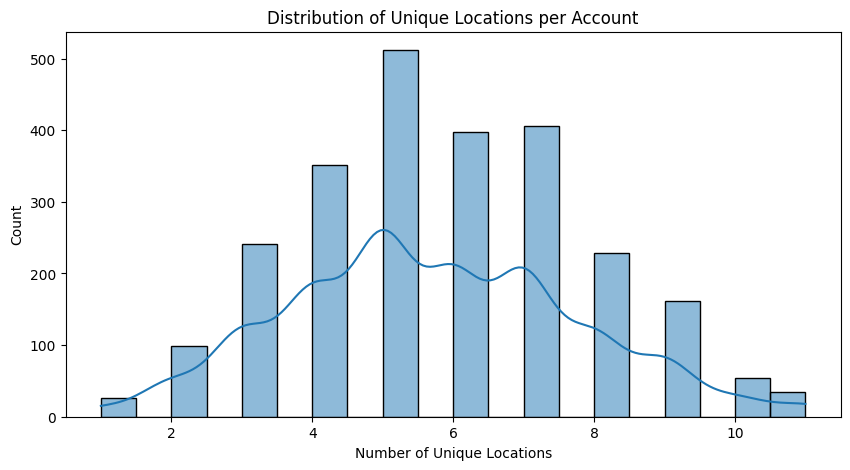

In [ ]:
location_pattern=df.groupby('AccountID')['Location'].nunique().reset_index().rename(columns={'Location':'UniqueLocationsCount'})
df=df.merge(location_pattern,on='AccountID')
high_location_variability=df[df['UniqueLocationsCount']>5]
print(f'Number of accounts with high location variability: {len(high_location_variability)}')
display(high_location_variability.head())

plt.figure(figsize=(10,5))
sns.histplot(df['UniqueLocationsCount'],bins=20,kde=True)
plt.title('Distribution of Unique Locations per Account')
plt.xlabel('Number of Unique Locations')
plt.show()

  channel TransactionType  count
0     ATM          Credit     73
1     ATM           Debit    760
2  Branch          Credit    251
3  Branch           Debit    617
4  Online          Credit    244
5  Online           Debit    567


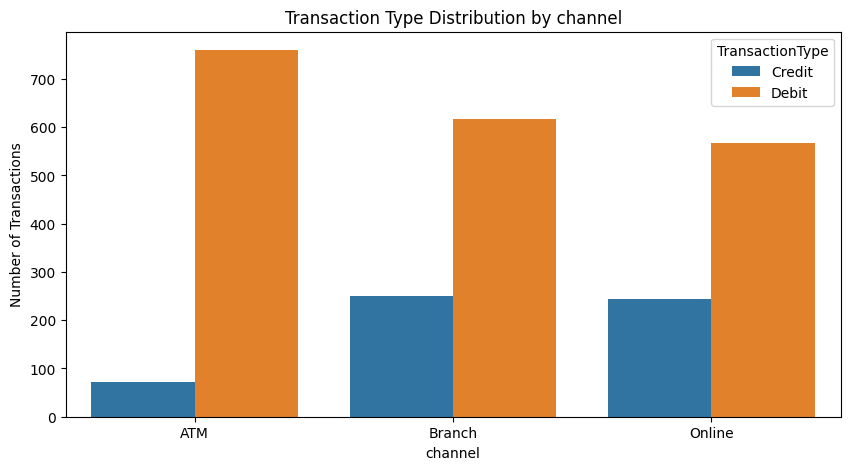

In [ ]:
channel_analysis = df.groupby(['Channel', 'TransactionType'])['TransactionID'].count().reset_index()
channel_analysis.columns = ['channel','TransactionType','count']
print(channel_analysis)

plt.figure(figsize=(10,5))
sns.barplot(data=channel_analysis, x='channel',y='count',hue='TransactionType')
plt.title("Transaction Type Distribution by channel")
plt.xlabel('channel')
plt.ylabel('Number of Transactions')
plt.show()

Number of devices with multiple accounts: 609


,DeviceID,UniqueAccounts
0,D000001,4
1,D000002,5
2,D000003,2
3,D000004,4
4,D000005,6
...,...,...
676,D000696,2
677,D000697,9
678,D000698,3
679,D000699,2


Text(0, 0.5, 'Frequency')

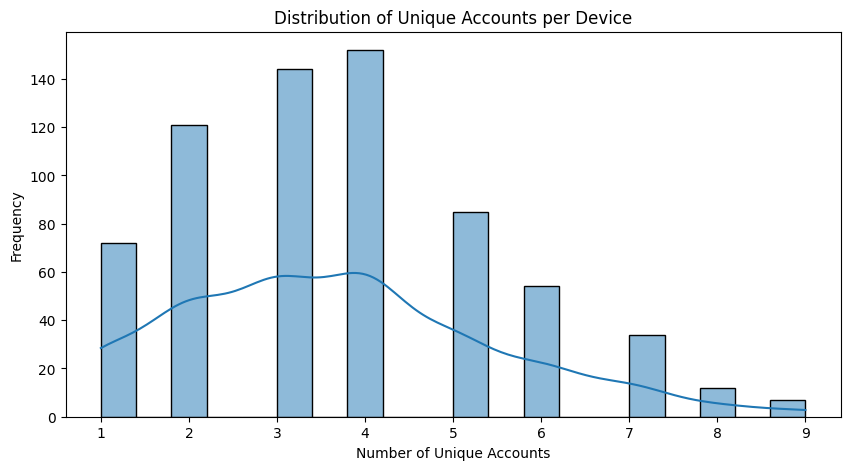

In [ ]:
device_accounts=df.groupby('DeviceID')['AccountID'].nunique().reset_index().rename(columns={'AccountID':'UniqueAccounts'})
suspicious_devices=device_accounts[device_accounts['UniqueAccounts']>1]
print(f'Number of devices with multiple accounts: {len(suspicious_devices)}')
display(suspicious_devices)

plt.figure(figsize=(10,5))
sns.histplot(device_accounts['UniqueAccounts'],bins=20,kde=True)
plt.title('Distribution of Unique Accounts per Device')
plt.xlabel('Number of Unique Accounts')
plt.ylabel('Frequency')

Number of IP addresses with multiple accounts: 552


,IP Address,UniqueAccounts
0,1.198.76.182,8
1,1.238.163.61,3
2,1.7.29.72,2
3,1.98.25.114,3
4,10.144.131.89,3
...,...,...
587,97.106.5.76,4
588,97.4.209.133,4
589,98.255.160.110,5
590,98.39.212.221,6


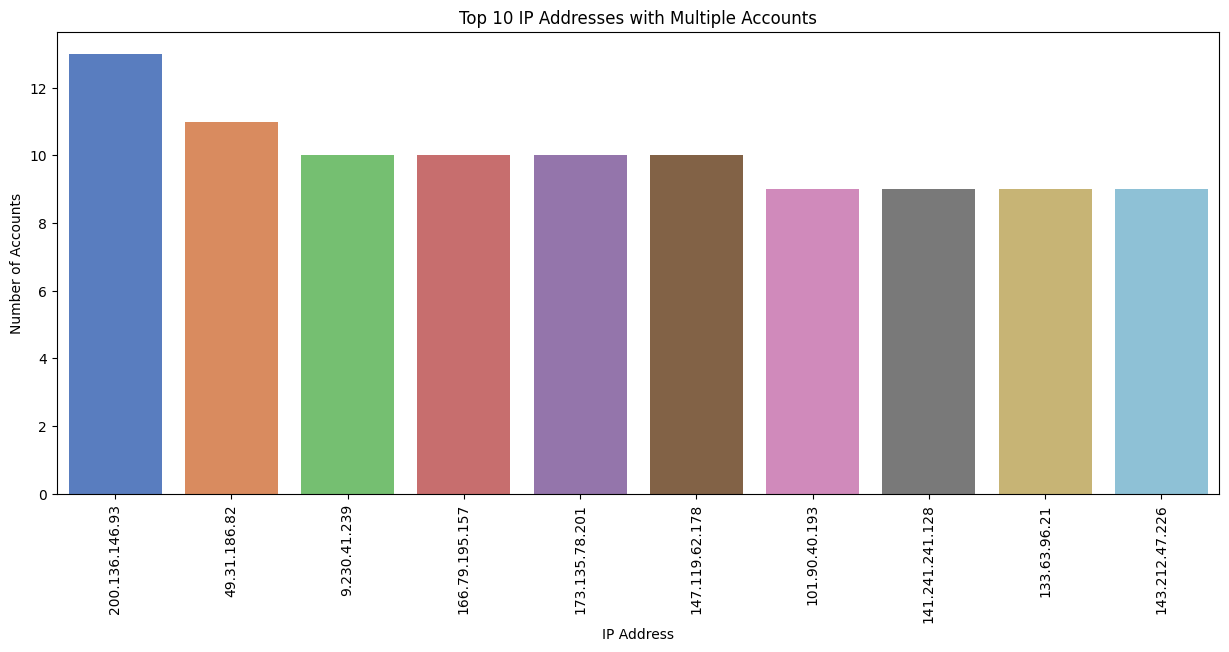

In [ ]:
ip_counts=df.groupby('IP Address')['AccountID'].nunique().reset_index()
ip_counts.columns=['IP Address','UniqueAccounts']
shared_ips=ip_counts[ip_counts['UniqueAccounts']>1]
print(f'Number of IP addresses with multiple accounts: {len(shared_ips)}')
display(shared_ips)

plt.figure(figsize=(15,6))
top_shared_ips=shared_ips.sort_values(by='UniqueAccounts',ascending=False).head(10)
sns.barplot(x=top_shared_ips['IP Address'],y=top_shared_ips['UniqueAccounts'],palette='muted')
plt.title('Top 10 IP Addresses with Multiple Accounts')
plt.xlabel('IP Address')
plt.ylabel('Number of Accounts')
plt.xticks(rotation=90)
plt.show()

Number of long duration transactions (above 259.5708259512189 seconds): 142


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount
7,TX000008,AC00069,171.42,2023-05-08 17:47:59,Credit,Indianapolis,D000500,92.214.76.157,M020,Branch,67,Retired,291,1,2796.24,2024-11-04 08:10:55,2967.66,17,231.082857,6
25,TX000026,AC00041,7.49,2023-10-20 17:53:13,Credit,Houston,D000671,81.248.235.147,M043,Online,65,Retired,276,1,3634.67,2024-11-04 08:09:44,3642.16,17,164.240000,7
29,TX000030,AC00313,56.17,2023-09-20 16:55:42,Debit,Detroit,D000297,33.28.138.82,M043,Branch,27,Student,283,1,1351.69,2024-11-04 08:08:30,1295.52,16,247.900000,3
51,TX000052,AC00482,424.56,2023-02-21 17:45:55,Debit,Omaha,D000598,179.43.245.131,M015,Online,51,Engineer,264,1,5183.85,2024-11-04 08:09:02,4759.29,17,265.671667,5
73,TX000074,AC00110,233.92,2023-10-20 16:54:28,Credit,Jacksonville,D000295,152.140.239.181,M046,Online,26,Student,280,1,6537.62,2024-11-04 08:08:45,6771.54,16,313.471250,8


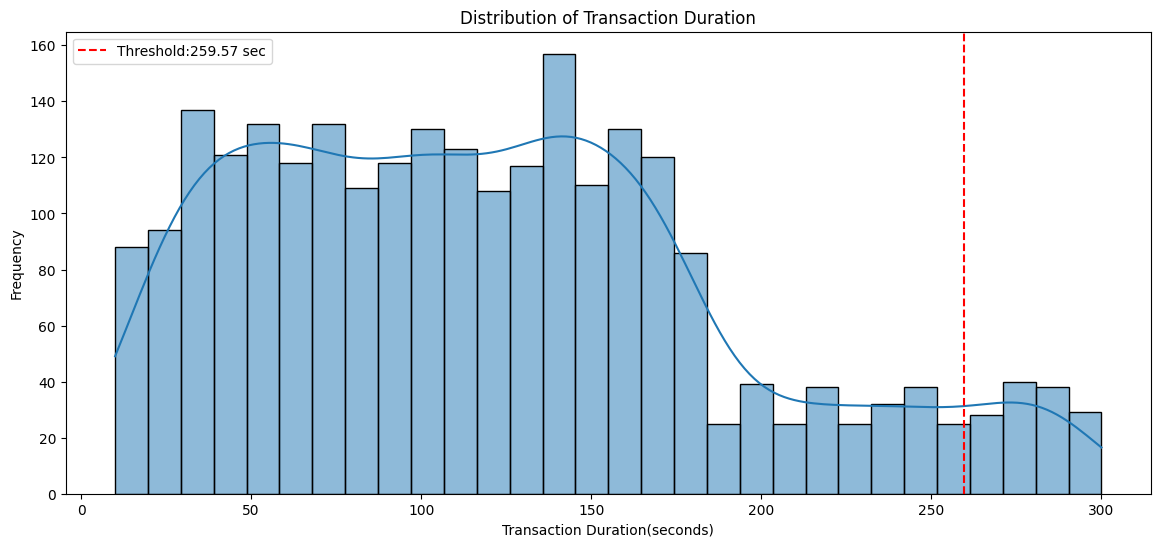

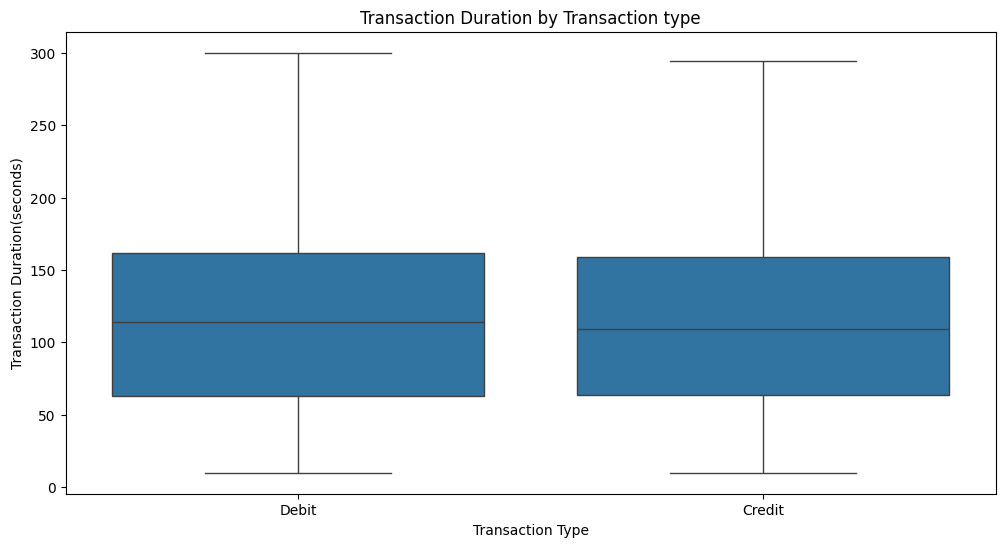

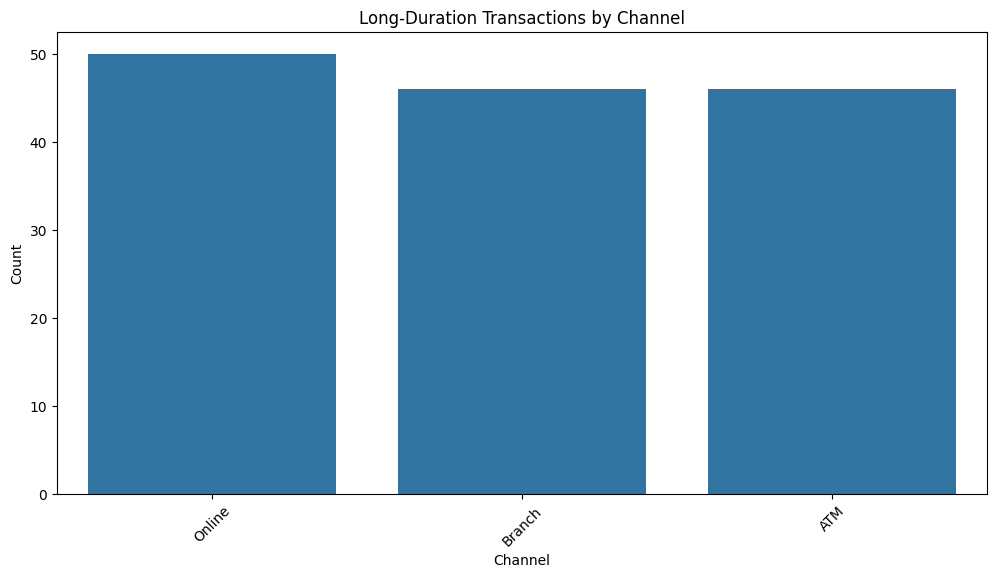

In [ ]:
# calculate summary statistics for TransctionDuration
duration_mean = df['TransactionDuration'].mean()
duration_std = df['TransactionDuration'].std()
long_duration_threshold = duration_mean + 2 * duration_std

#identify long_duration transactions
long_duration_transactions = df[df['TransactionDuration'] > long_duration_threshold]
print(f'Number of long duration transactions (above {long_duration_threshold} seconds): {len(long_duration_transactions)}')
display(long_duration_transactions.head())

#visualize distribution of TransactionDuration
plt.figure(figsize=(14,6))
sns.histplot(df['TransactionDuration'],bins=30,kde=True)
plt.axvline(long_duration_threshold,color='red',linestyle='--',label=f"Threshold:{long_duration_threshold:.2f} sec")
plt.title('Distribution of Transaction Duration')
plt.xlabel('Transaction Duration(seconds)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# boxplot to visualize potential outliers in TransactionDuration
plt.figure(figsize=(12,6))
sns.boxplot(x='TransactionType',y='TransactionDuration',data=df)
plt.title('Transaction Duration by Transaction type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Duration(seconds)')
plt.show()

# additional exploration : long-durtion trnsactions by chnnel
plt.figure(figsize=(12,6))
sns.countplot(data=long_duration_transactions,x='Channel',order = long_duration_transactions['Channel'].value_counts().index)
plt.title('Long-Duration Transactions by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Identifying Potential Frauds with K-mens Clusturing**

In [ ]:
features = ['TransactionAmount','TransactionDuration']
X = df[features].copy()

Scalar = StandardScaler()
X_scaled = Scalar.fit_transform(X)

inertia = []
K = range(1,10)
for k in K :
  kmeans = KMeans(n_clusters=k,random_state=0)
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

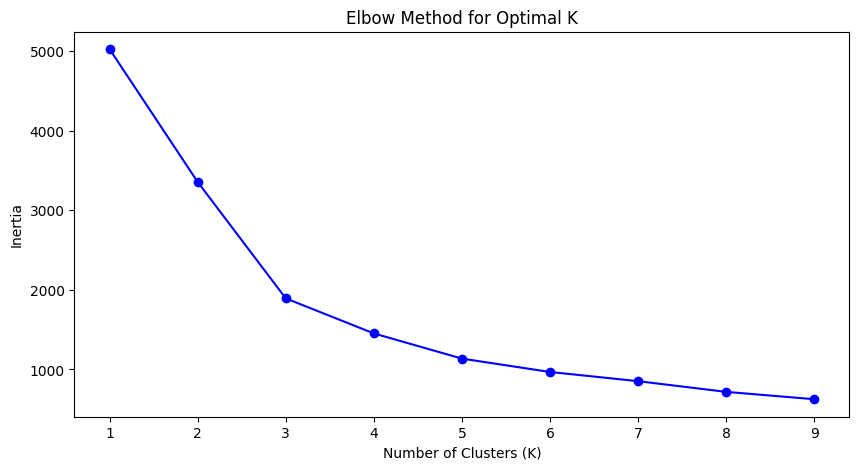

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(K,inertia,'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3,random_state=0)
kmeans.fit(X_scaled)

df['Cluster'] = kmeans.labels_
df['DistanceToCentroid'] = np.linalg.norm(X_scaled - kmeans.cluster_centers_[kmeans.labels_], axis=1)

threshold = df['DistanceToCentroid'].quantile(0.95)
potential_frauds = df[df['DistanceToCentroid'] > threshold]
print(f'Number of potential frauds detected: {len(potential_frauds)}')
display(potential_frauds)

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid
74,TX000075,AC00265,1212.51,2023-10-04 16:36:29,Debit,Indianapolis,D000231,193.83.0.183,M036,Branch,...,24,1,605.95,2024-11-04 08:06:51,-606.56,16,439.288889,9,0,1.876727
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,...,30,1,8654.28,2024-11-04 08:06:53,9994.47,17,642.514000,5,0,2.163279
141,TX000142,AC00114,1049.92,2023-10-23 16:50:33,Debit,Detroit,D000522,121.67.144.20,M052,ATM,...,21,1,2037.85,2024-11-04 08:10:34,987.93,16,317.322857,7,0,1.562140
142,TX000143,AC00163,227.14,2023-07-03 17:42:08,Debit,Charlotte,D000439,197.162.55.147,M057,ATM,...,294,1,341.94,2024-11-04 08:11:34,114.80,17,307.955000,2,2,1.521390
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,296,1,2042.22,2024-11-04 08:11:44,1068.83,17,591.600000,7,0,2.640557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2403,TX002404,AC00111,1493.00,2023-06-07 17:05:41,Debit,Colorado Springs,D000344,136.162.111.135,M096,ATM,...,151,1,1619.16,2024-11-04 08:07:07,126.16,17,438.818571,6,0,2.368753
2414,TX002415,AC00028,1664.33,2023-09-25 17:11:19,Debit,San Antonio,D000072,116.106.207.139,M064,Branch,...,65,1,1588.31,2024-11-04 08:07:07,-76.02,17,723.390000,3,0,2.986511
2439,TX002440,AC00439,538.17,2023-09-26 17:27:17,Credit,Washington,D000430,116.44.12.250,M055,Branch,...,252,1,5908.04,2024-11-04 08:10:25,6446.21,17,465.090000,7,2,1.490003
2445,TX002446,AC00439,403.01,2023-09-04 17:32:35,Debit,Washington,D000677,223.32.70.156,M029,Online,...,286,3,10513.52,2024-11-04 08:09:32,10110.51,17,465.090000,7,2,1.573122


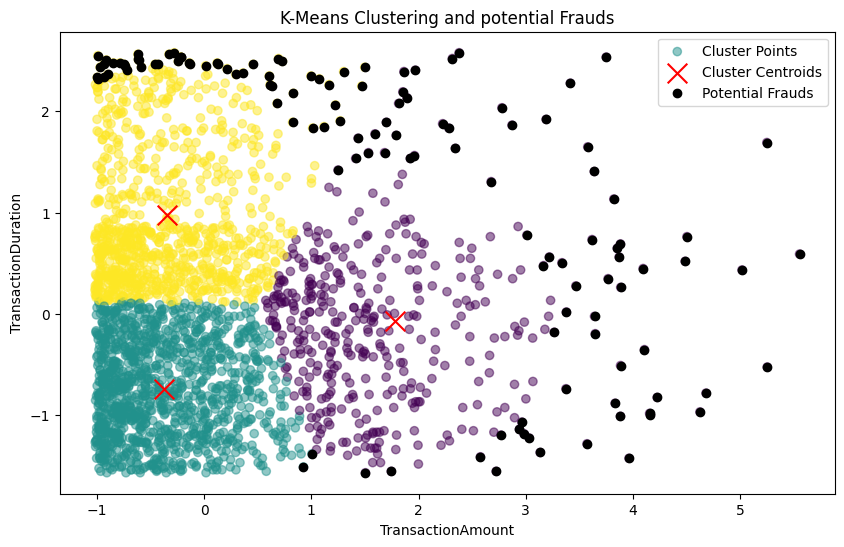

In [ ]:
plt.figure(figsize=(10,6))

scatter = plt.scatter(X_scaled[:,0],X_scaled[:,1],c=kmeans.labels_,cmap='viridis',alpha=0.5,label='Cluster Points')

centroids = plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='x',s=200,label='Cluster Centroids')

frauds = plt.scatter(X_scaled[potential_frauds.index,0], X_scaled[potential_frauds.index,1],c='black',label='Potential Frauds')

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('K-Means Clustering and potential Frauds')
plt.legend(loc='upper right')
plt.show()

In [ ]:
label_mapping={
    -1:'Fraud(Outliers)',
    0:'Normal',
    1:'Suspicious Group 1',
    2:'Suspicious Group 2',
    3:'Suspicious Group 3',
    4:'Suspicious Group 4'
}
features=['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X=df[features].copy()

X=X.fillna(X.mean())

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

dbscan=DBSCAN(eps=1.5,min_samples=5)
dbscan.fit(X_scaled)

df['DBSCAN_Cluster']=dbscan.labels_
df['Cluster_Description']=df['DBSCAN_Cluster'].map(label_mapping)

potential_frauds=df[df['DBSCAN_Cluster']==-1]
print(f'Number of potential frauds detected: {len(potential_frauds)}')
display(potential_frauds)

Number of potential frauds detected: 17


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,AccountBalance,PreviousTransactionDate,BalanceChange,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description
274,TX000275,AC00454,1176.28,2023-12-20 16:08:02,Credit,Kansas City,D000476,50.202.8.53,M074,ATM,...,323.69,2024-11-04 08:11:44,1499.97,16,494.182500,4,0,1.488559,-1,Fraud(Outliers)
454,TX000455,AC00264,611.11,2023-10-18 18:32:31,Debit,Detroit,D000215,141.201.46.191,M045,ATM,...,919.84,2024-11-04 08:11:12,308.73,18,441.255000,6,2,1.959599,-1,Fraud(Outliers)
653,TX000654,AC00423,1919.11,2023-06-27 17:48:25,Debit,Portland,D000191,207.157.126.125,M033,ATM,...,11090.24,2024-11-04 08:10:27,9171.13,17,506.356667,5,0,3.828962,-1,Fraud(Outliers)
693,TX000694,AC00011,733.29,2023-03-15 18:42:16,Debit,Virginia Beach,D000618,16.51.235.240,M032,ATM,...,10427.00,2024-11-04 08:07:12,9693.71,18,348.322857,5,0,0.418493,-1,Fraud(Outliers)
754,TX000755,AC00153,84.34,2023-06-08 16:27:56,Debit,Memphis,D000493,200.136.146.93,M039,Online,...,5313.97,2024-11-04 08:09:31,5229.63,16,350.270000,7,2,0.940290,-1,Fraud(Outliers)
772,TX000773,AC00093,827.14,2023-01-17 17:25:13,Debit,El Paso,D000645,215.97.143.157,M018,Branch,...,9800.21,2024-11-04 08:08:14,8973.07,17,351.714444,8,0,2.143408,-1,Fraud(Outliers)
898,TX000899,AC00083,1531.31,2023-10-23 18:00:29,Debit,San Diego,D000319,91.204.200.167,M078,Online,...,859.86,2024-11-04 08:06:40,-671.45,18,458.896667,5,0,2.558815,-1,Fraud(Outliers)
1156,TX001157,AC00211,917.81,2023-08-30 18:38:56,Debit,Kansas City,D000217,42.61.10.112,M047,ATM,...,3173.17,2024-11-04 08:09:46,2255.36,18,497.390000,4,0,0.667273,-1,Fraud(Outliers)
1213,TX001214,AC00170,1192.20,2023-12-21 16:21:27,Credit,Jacksonville,D000174,40.10.25.102,M093,Branch,...,7816.41,2024-11-04 08:09:14,9008.61,16,247.325714,6,0,1.293496,-1,Fraud(Outliers)
1309,TX001310,AC00470,470.96,2023-03-10 16:22:05,Credit,Indianapolis,D000600,106.244.1.47,M036,Online,...,12991.03,2024-11-04 08:11:10,13461.99,16,426.270000,4,0,1.195851,-1,Fraud(Outliers)


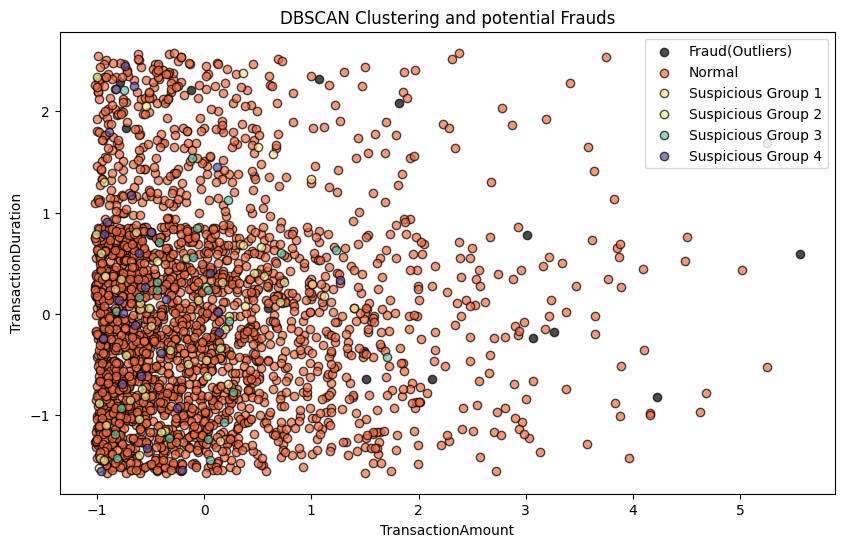

In [ ]:
plt.figure(figsize=(10,6))
unique_labels=np.unique(dbscan.labels_)
colors=[plt.cm.Spectral(each) for each in np.linspace(0,1,len(unique_labels))]

for k,col in zip(unique_labels,colors):
  if k==-1:
    col=[0,0,0,1]
  class_member_mask=(dbscan.labels_==k)
  xy=X_scaled[class_member_mask]
  plt.scatter(xy[:,0], xy[:,1], color=tuple(col), edgecolor='k', alpha=0.7, label=label_mapping.get(k, f'Cluster {k}'))

plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title('DBSCAN Clustering and potential Frauds')
plt.legend()
plt.show()

In [ ]:
outlier_mapping={ 1: 'Normal', -1: 'Potential Fraud'}

features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']
X = df[features].copy()

X = X.fillna(X.mean())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
iso_forest.fit(X_scaled)

df['AnomalyScore'] = iso_forest.decision_function(X_scaled)
df['IsAnomaly'] = iso_forest.predict(X_scaled)

df['AnomalyLabel'] = df['IsAnomaly'].map(outlier_mapping)
potential_frauds = df[df['IsAnomaly']==-1]
print(f'Number of potential frauds detected: {len(potential_frauds)}')
display(potential_frauds.head())

Number of potential frauds detected: 126


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,...,TransactionHour,AverageTransactionAmount,UniqueLocationsCount,Cluster,DistanceToCentroid,DBSCAN_Cluster,Cluster_Description,AnomalyScore,IsAnomaly,AnomalyLabel
26,TX000027,AC00441,246.93,2023-04-17 16:37:01,Debit,Miami,D000046,55.154.161.250,M029,ATM,...,16,317.948333,6,2,0.461840,2,Suspicious Group 2,-0.075150,-1,Potential Fraud
32,TX000033,AC00060,396.45,2023-09-25 16:26:00,Debit,New York,D000621,133.67.250.163,M007,ATM,...,16,388.180000,4,2,0.744993,1,Suspicious Group 1,-0.014181,-1,Potential Fraud
85,TX000086,AC00098,1340.19,2023-09-29 17:22:10,Credit,Austin,D000574,165.114.224.47,M012,Online,...,17,642.514000,5,0,2.163279,0,Normal,-0.018206,-1,Potential Fraud
91,TX000092,AC00310,223.85,2023-10-02 16:36:10,Debit,Kansas City,D000481,133.223.159.151,M009,ATM,...,16,439.977143,7,1,0.221557,4,Suspicious Group 4,-0.029888,-1,Potential Fraud
146,TX000147,AC00385,973.39,2023-08-30 17:23:20,Debit,Sacramento,D000292,202.194.199.70,M026,Branch,...,17,591.600000,7,0,2.640557,0,Normal,-0.016904,-1,Potential Fraud


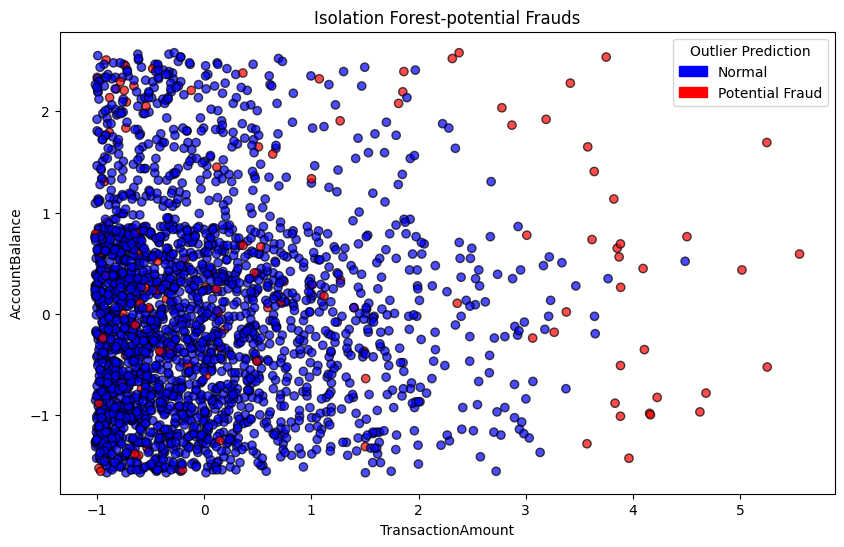

In [ ]:
colors = np.where(df['IsAnomaly']==-1, 'r','b')

plt.figure(figsize=(10,6))
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=colors,alpha=0.7,cmap='coolwarm', edgecolors='k', label='Data Points')

normal_patch = mpatches.Patch(color='b', label='Normal')
fraud_patch = mpatches.Patch(color='r', label='Potential Fraud')
plt.legend(handles=[normal_patch, fraud_patch], title='Outlier Prediction')

plt.xlabel(features[0])
plt.ylabel(features[2])
plt.title('Isolation Forest-potential Frauds')
plt.show()

In [ ]:
revised_dataset = df.to_csv('revised_dataset.csv', index=False)